## Analyzing the training images

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
from fast.utils.img_loader import load_image_list_renormalize, renormalize
from markers_and_labels import KWARGS_PER_LABEL, LABELS
from scipy import stats
from tqdm.notebook import tqdm

In [3]:
base_path = Path("selected_images/")
image_files_all = list(base_path.glob("*.tiff"))

In [4]:
images_all = load_image_list_renormalize(image_files_all, img_format="tiff")

In [5]:
gradients_all = [np.gradient(im) for im in images_all]

In [6]:
norm_grads = [(x**2 + y**2) ** 0.5 for (x, y) in gradients_all]

In [7]:
np.shape(norm_grads)

(11, 256, 256)

In [8]:
image_files_all

[PosixPath('selected_images/4.1.01.tiff'),
 PosixPath('selected_images/4.1.05.tiff'),
 PosixPath('selected_images/4.1.08.tiff'),
 PosixPath('selected_images/4.2.03.tiff'),
 PosixPath('selected_images/4.2.06.tiff'),
 PosixPath('selected_images/4.2.07.tiff'),
 PosixPath('selected_images/5.3.01.tiff'),
 PosixPath('selected_images/camera_new.tiff'),
 PosixPath('selected_images/5.1.12.tiff'),
 PosixPath('selected_images/5.1.11.tiff'),
 PosixPath('selected_images/cameraman_unscaled.tiff')]

In [9]:
titles = []
for imf in image_files_all:
    title = imf.stem
    if title in LABELS:
        title = LABELS[title]
    title = "cameraman" if title == "cameraman_unscaled" else title
    titles.append(title)

In [10]:
markers = [".", "o", "D", "s", "P", "X", "<", ">", "^", "v", "1", "2", "3"]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("dotted", (0, (1, 1))),
    ("densely dotted", (0, (1, 1))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("dashed", (0, (5, 5))),
    ("densely dashed", (0, (5, 1))),
    ("densely dotted", (0, (1, 1))),
    ("dashdotted", (0, (3, 5, 1, 5))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
lst = [t[1] for t in linestyle_tuple]

prop_cycler = cycler(marker=markers) + cycler(ls=lst)

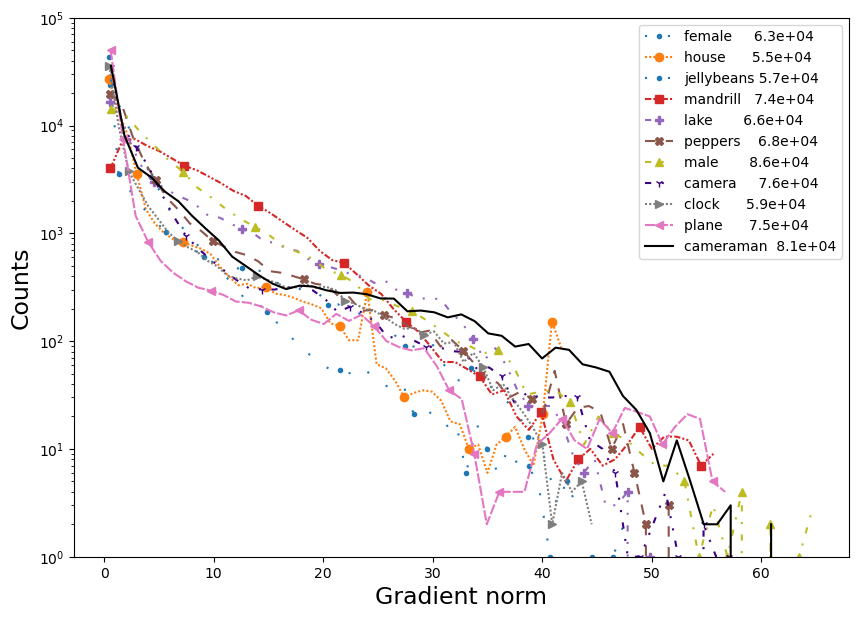

In [11]:
pc = prop_cycler()
plt.figure(figsize=[10, 7])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(norm_grads[_ix].ravel(), bins=50)  # , density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10} {auc: <5.2g}"
    # plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
    density = stats.gaussian_kde(grs.ravel())
    x = np.linspace(grs.min(), grs.max(), 50)

    plt.plot(centers, counts, label=label, markevery=0.1, **KWARGS_PER_LABEL[titles[_ix]])
#
# plt.plot(x, density(x) * grs.size, label=label, **kwargs, markevery=0.25)
#    plt.title(title)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1, 1e5)
plt.xlabel("Gradient norm", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

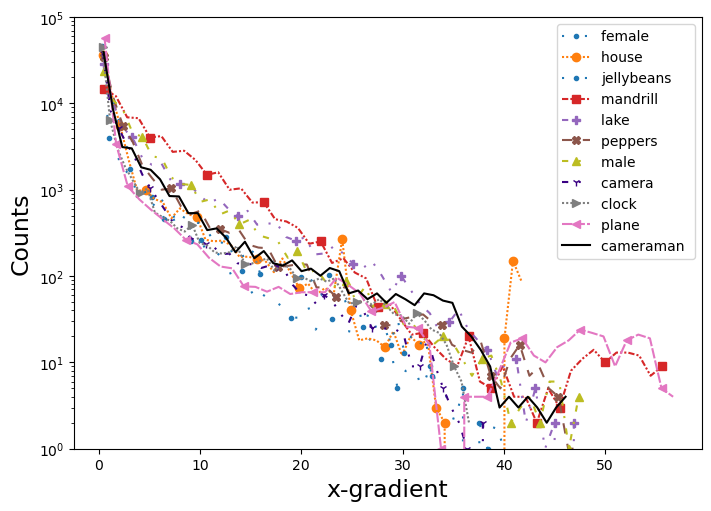

In [12]:
pc = prop_cycler()
plt.figure(figsize=[7, 5], constrained_layout=True)
for _ix, (grs, _) in enumerate(gradients_all):
    counts, edges = np.histogram(np.abs(grs).ravel(), bins=50)
    centers = 0.5 * (edges[1:] + edges[:-1])
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10}"  # {auc: <5.2g}'
    # plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
    density = stats.gaussian_kde(grs.ravel())
    x = np.linspace(grs.min(), grs.max(), 50)

    plt.plot(centers, counts, label=label, markevery=0.1, **KWARGS_PER_LABEL[titles[_ix]])
#    plt.title(title)
plt.legend(loc="best")
plt.ylim(1, 1e5)
plt.yscale("log")
plt.xlabel("x-gradient", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

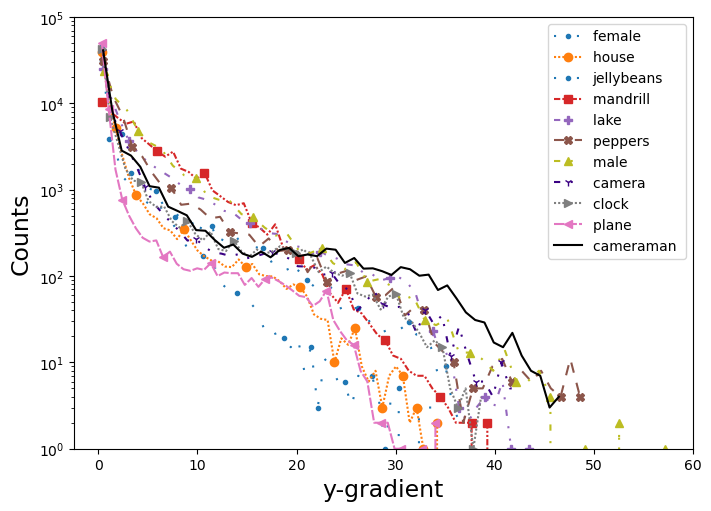

In [13]:
plt.figure(figsize=[7, 5], constrained_layout=True)
for _ix, (_, grs) in enumerate(gradients_all):
    counts, edges = np.histogram(np.abs(grs).ravel(), bins=50)
    centers = 0.5 * (edges[1:] + edges[:-1])
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10}"  # {auc: <5.2g}'
    # plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
    density = stats.gaussian_kde(grs.ravel())
    x = np.linspace(grs.min(), grs.max(), 50)
    plt.plot(centers, counts, label=label, markevery=0.1, **KWARGS_PER_LABEL[titles[_ix]])
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1, 1e5)
plt.xlabel("y-gradient", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

In [14]:
figures_path = Path("paper_figures_and_results/training_images")
figures_path.mkdir(exist_ok=True)

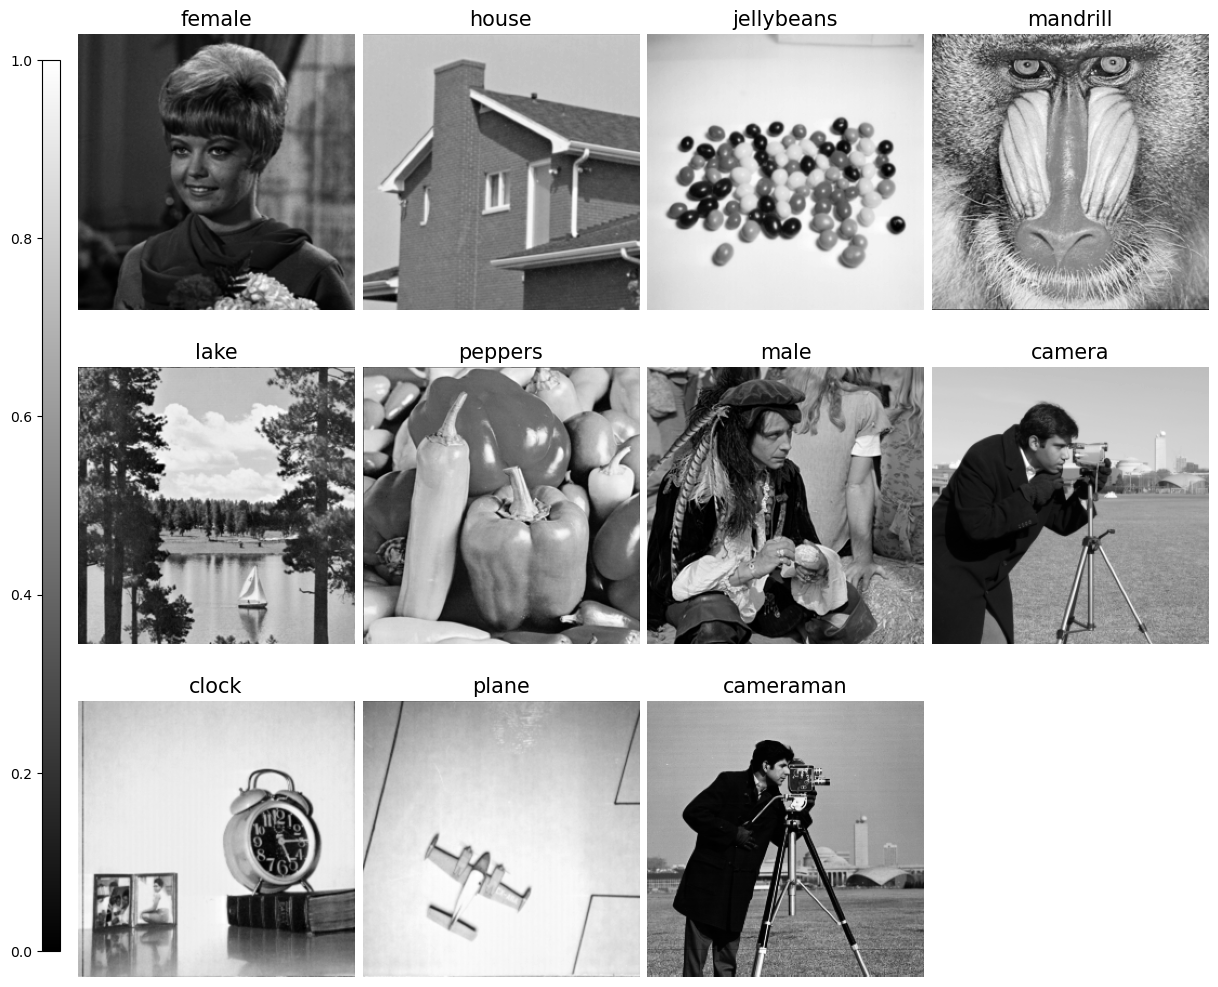

In [15]:
fig, axs = plt.subplots(3, 4, figsize=[12, 10], constrained_layout=True)
axs = axs.ravel()
for _ix, img in enumerate(images_all):
    title = image_files_all[_ix].stem
    if title in LABELS:
        title = LABELS[title]
    title = "cameraman" if title == "cameraman_unscaled" else title
    im = axs[_ix].imshow(img / 100, cmap="gray", rasterized=True)
    axs[_ix].set_title(title, fontsize=15)
    axs[_ix].axis("off")
fig.delaxes(axs[-1])
fig.colorbar(im, ax=axs.tolist(), fraction=0.6, shrink=0.9, pad=0.01, aspect=50, location="left")
# plt.savefig(f"{figures_path}/training_images.svg", bbox_inches="tight", dpi=400, transparent=True)
plt.savefig(f"{figures_path}/training_images.pdf", bbox_inches="tight", dpi=300, transparent=True)
plt.show()

In [17]:
def power_spectrum(image):
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image) ** 2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0] ** 2 + kfreq2D[1] ** 2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix // 2 + 1, 1.0)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes, statistic="mean", bins=kbins)
    Abins *= np.pi * (kbins[1:] ** 2 - kbins[:-1] ** 2)
    return kvals, Abins

In [18]:
power_spectra_all = [power_spectrum(im / 100) for im in images_all]

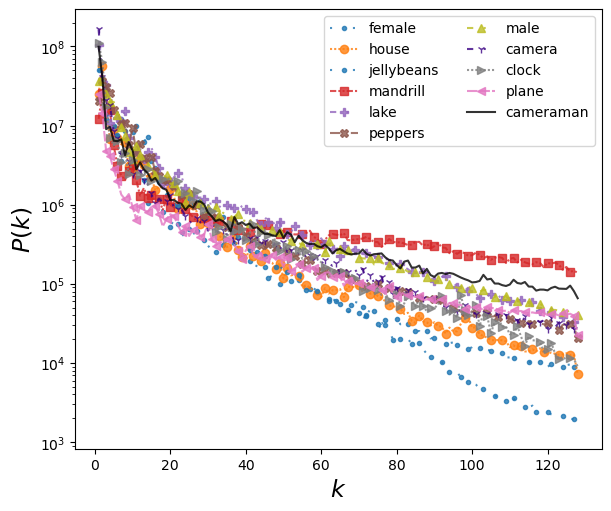

In [35]:
plt.figure(figsize=[6, 5], constrained_layout=True)
for _ix, (k, p) in enumerate(power_spectra_all):
    KWARGS_PER_LABEL[titles[_ix]]["alpha"] = 0.8
    plt.plot(k, p, label=titles[_ix], markevery=0.02, **KWARGS_PER_LABEL[titles[_ix]])
plt.legend(loc="best", ncols=2)
plt.yscale("log")
# plt.xscale('log')
# plt.xlim([0, 40])
plt.ylabel(r"$P(k)$", fontsize=17)
plt.xlabel(r"$k$", fontsize=17)
plt.savefig(f"{figures_path}/power_spectrum.svg", bbox_inches="tight", dpi=600, transparent=True)
plt.savefig(f"{figures_path}/power_spectrum.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

In [20]:
import skimage

In [21]:
contrasts = [skimage.exposure.histogram(im / 100, nbins=100) for im in images_all]

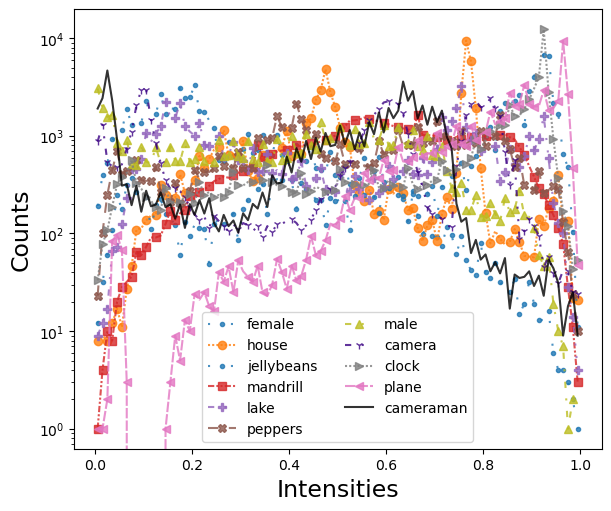

In [36]:
plt.figure(figsize=[6, 5], constrained_layout=True)
for _ix, (counts, centers) in enumerate(contrasts):
    label = f"{titles[_ix]}"
    plt.plot(centers, counts, label=label, markevery=0.02, **KWARGS_PER_LABEL[titles[_ix]])
plt.ylabel("Counts", fontsize=17)
plt.xlabel("Intensities", fontsize=17)
# plt.ylim([0, 1000])
plt.yscale("log")
plt.legend(loc="best", ncols=2)
plt.savefig(f"{figures_path}/contrasts.svg", bbox_inches="tight", dpi=600, transparent=True)
plt.savefig(f"{figures_path}/contrasts.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

In [31]:
cdfs = [skimage.exposure.cumulative_distribution(im / 100) for im in images_all]

In [32]:
cdfs_diffs = [np.abs(d[0] - d[1]).sum() for d in cdfs]

In [33]:
for img, c in zip(titles, cdfs_diffs):
    print(img, c)

female 62.9190673828125
house 23.825790405273438
jellybeans 71.00401306152344
mandrill 29.246200561523438
lake 11.18878173828125
peppers 14.065414428710938
male 30.222183227539062
camera 16.86981201171875
clock 56.56861877441406
plane 84.30238342285156
cameraman 23.783416748046875


In [ ]:
plt.figure(figsize=[6, 5], constrained_layout=True)
for _ix, (k, p) in enumerate(cdfs):
    plt.plot(p, k, label=titles[_ix], markevery=0.02, **KWARGS_PER_LABEL[titles[_ix]])
# plt.plot([0, 0.5, 1.0], [0, 0.5, 1.0], color="black")
plt.legend(loc="best", ncols=1)
# plt.ylim([0, 1000])
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel(r"Cum. Dist. Func.", fontsize=17)
plt.xlabel(r"Intensity", fontsize=17)
plt.savefig(f"{figures_path}/cdf.svg", bbox_inches="tight", dpi=600, transparent=True)
plt.savefig(f"{figures_path}/cdf.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

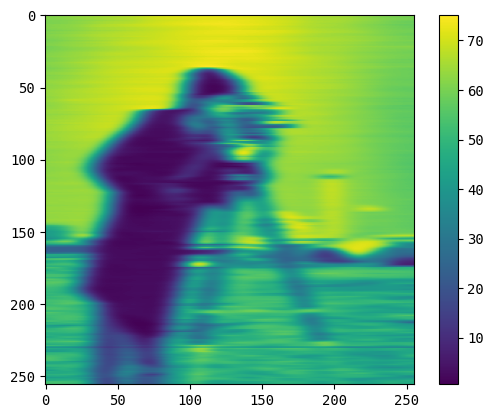

In [121]:
plt.imshow(scipy.ndimage.gaussian_filter(images_all[-1], sigma=(0, 7)))
plt.colorbar()

In [48]:
structs = [skimage.feature.structure_tensor(im, sigma=5) for im in images_all]

/tmp/ipykernel_1206892/28355535.py:1: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  structs = [skimage.feature.structure_tensor(im, sigma=5) for im in images_all]


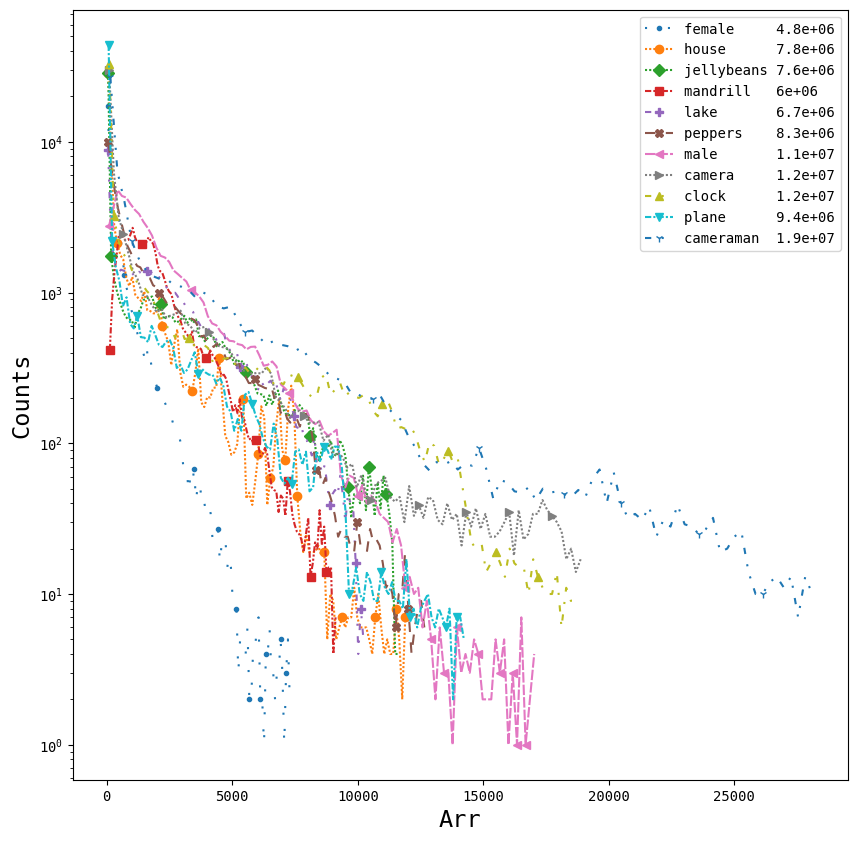

In [49]:
pc = prop_cycler()
plt.figure(figsize=[10, 10])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(structs[_ix][0].ravel(), bins=100)
    centers = 0.5 * (edges[1:] + edges[:-1])
    # plt.hist(gradients_all[_ix][0].ravel(), bins=100)
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10} {auc: <5.2g}"
    plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
#    plt.title(title)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("Arr", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

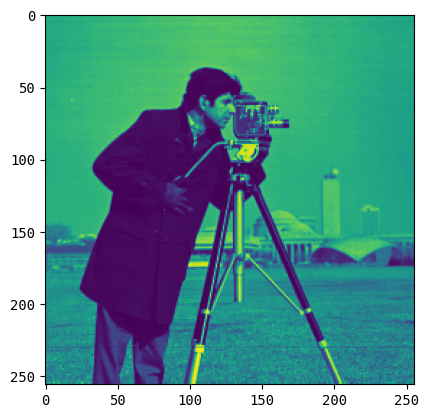

In [59]:
plt.imshow(images_all[-1])

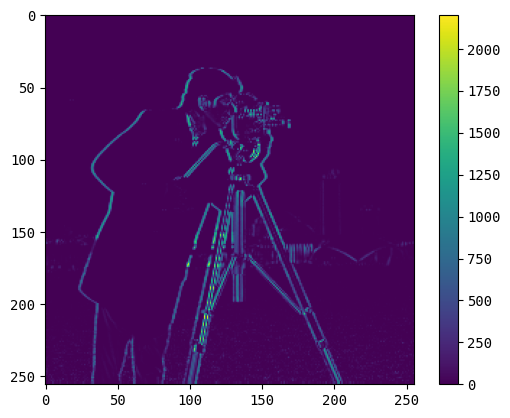

In [64]:
plt.imshow(gradients_all[-1][1] ** 2)
plt.colorbar()

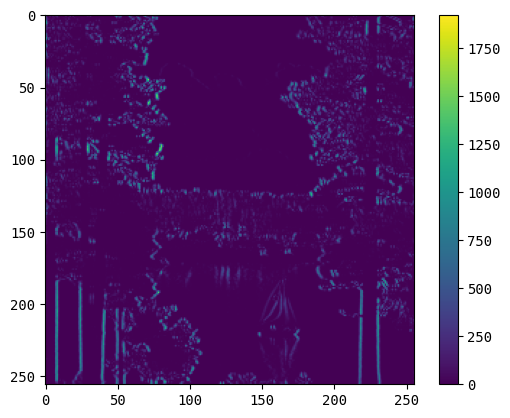

In [65]:
plt.imshow(gradients_all[4][1] ** 2)
plt.colorbar()

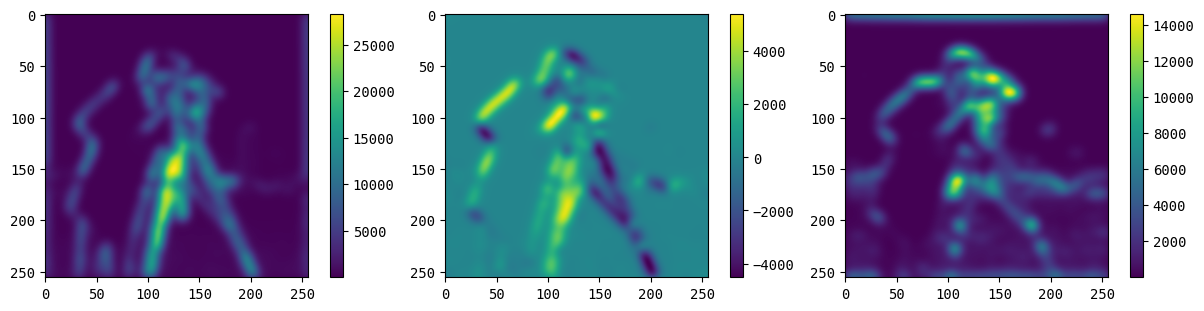

In [57]:
fig, axs = plt.subplots(1, 3, figsize=[12, 3], constrained_layout=True)
plt.subplot(1, 3, 1)
plt.imshow(structs[-1][0])
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(structs[-1][1])
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(structs[-1][2])
plt.colorbar()

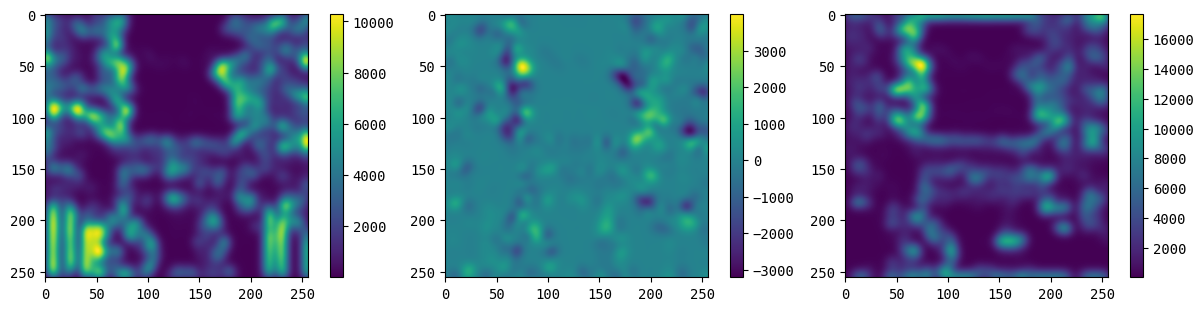

In [58]:
fig, axs = plt.subplots(1, 3, figsize=[12, 3], constrained_layout=True)
plt.subplot(1, 3, 1)
plt.imshow(structs[4][0])
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(structs[4][1])
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(structs[4][2])
plt.colorbar()

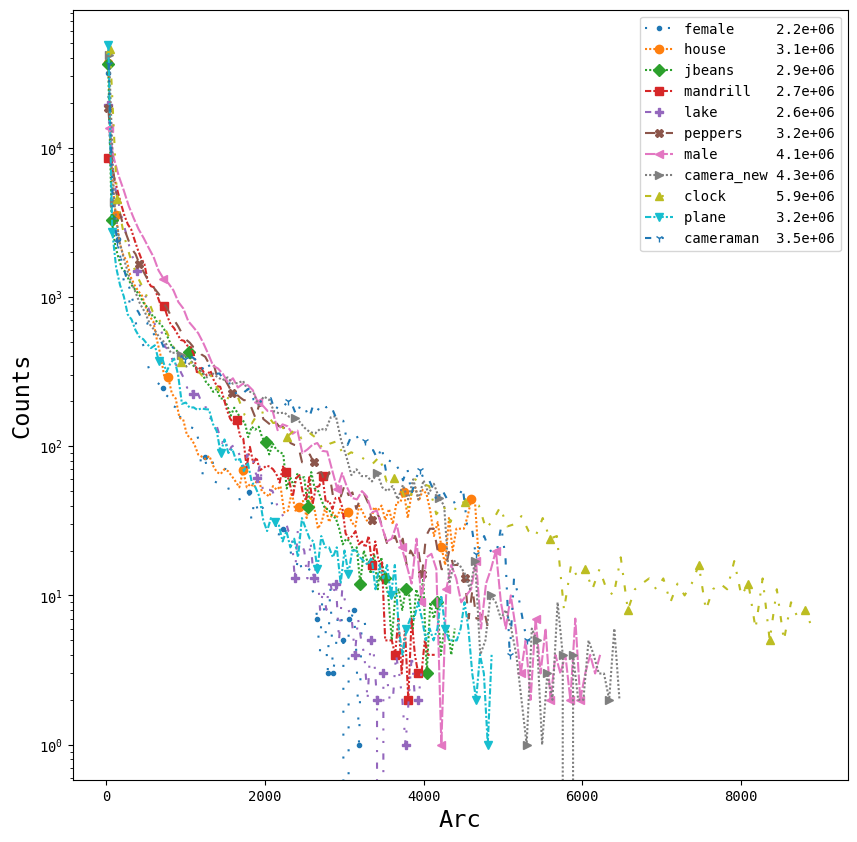

In [30]:
pc = prop_cycler()
plt.figure(figsize=[10, 10])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(np.abs(structs[_ix][1]).ravel(), bins=100)
    centers = 0.5 * (edges[1:] + edges[:-1])
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10} {auc: <5.2g}"
    plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("Arc", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

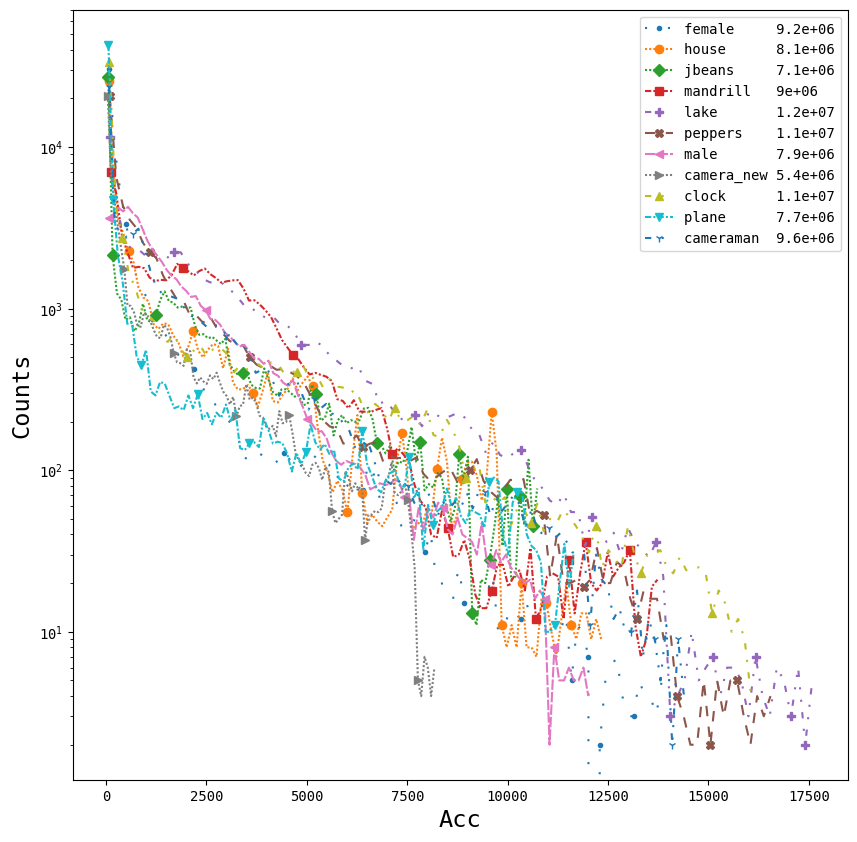

In [31]:
pc = prop_cycler()
plt.figure(figsize=[10, 10])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(np.abs(structs[_ix][2]).ravel(), bins=100)
    centers = 0.5 * (edges[1:] + edges[:-1])
    # plt.hist(gradients_all[_ix][0].ravel(), bins=100)
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10} {auc: <5.2g}"
    plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("Acc", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

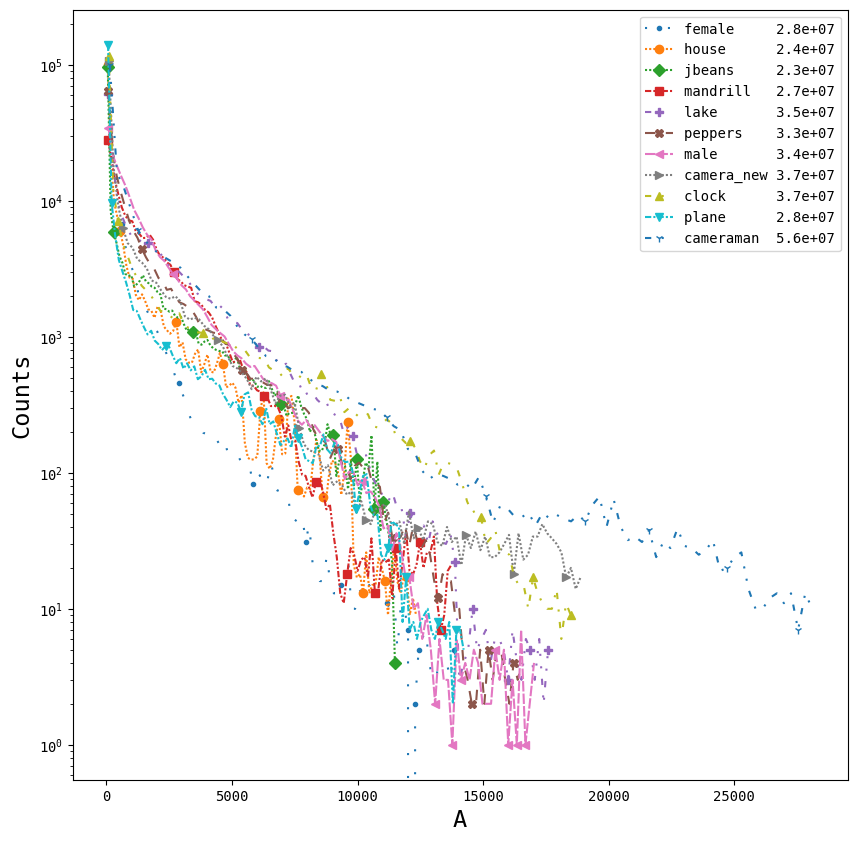

In [23]:
pc = prop_cycler()
plt.figure(figsize=[10, 10])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(np.abs(np.array(structs[_ix]).ravel()), bins=100)
    centers = 0.5 * (edges[1:] + edges[:-1])
    auc = np.sum(counts * (edges[1] - edges[0]))
    label = f"{titles[_ix]: <10} {auc: <5.2g}"
    plt.plot(centers, counts, label=label, **next(pc), markevery=0.15)
#    plt.title(title)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("A", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

In [104]:
struct_eigvals = [skimage.feature.structure_tensor_eigenvalues(st) for st in structs]

In [106]:
struct_eigvals[0].shape

(2, 256, 256)

In [134]:
np.sum(
    struct_eigvals[0][0].ravel()
    / np.linalg.norm(struct_eigvals[0][0].ravel())
    * struct_eigvals[0][1].ravel()
    / np.linalg.norm(struct_eigvals[0][1].ravel())
)

0.8350475842534012

In [135]:
np.sum(
    struct_eigvals[-1][0].ravel()
    / np.linalg.norm(struct_eigvals[-1][0].ravel())
    * struct_eigvals[-1][1].ravel()
    / np.linalg.norm(struct_eigvals[-1][1].ravel())
)

0.7134785109302088

In [131]:
f"{np.sum(struct_eigvals[-1][0].T @ struct_eigvals[-1][1]):3.2g}"

'4.8e+13'

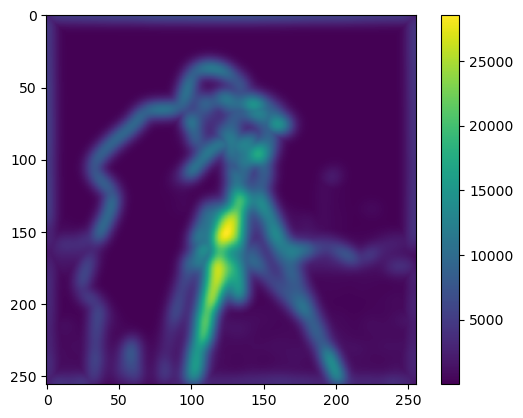

In [119]:
pc = prop_cycler()
plt.figure(figsize=[10, 10])
for _ix, grs in enumerate(norm_grads):
    counts, edges = np.histogram(gradients_all[_ix][1].ravel(), bins=100)
    centers = 0.5 * (edges[1:] + edges[:-1])
    # plt.hist(gradients_all[_ix][0].ravel(), bins=100)
    plt.plot(centers, counts, label=titles[_ix], **next(pc), markevery=0.15)
#    plt.title(title)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("y-gradient", fontsize=17)
plt.ylabel("Counts", fontsize=17)
plt.show()

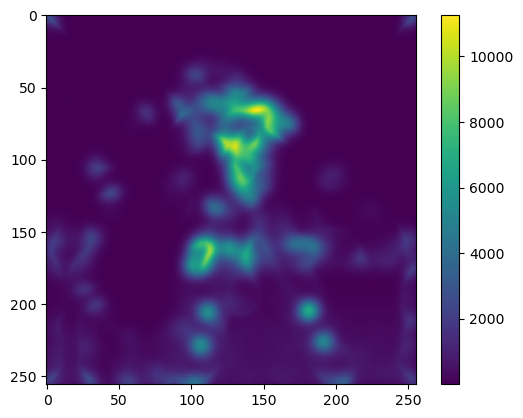

In [120]:
plt.imshow(struct_eigvals[-1][1])
plt.colorbar()